<a href="https://colab.research.google.com/github/AlexanderSutherland/CS7643_Project/blob/main/Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM Stock Price Prediction Project

**Add Necessary Imports**

In [1]:
'''
Add Necessary Imports:
'''
# Pytorch (Deep Learning Model Libraries)
import torch
import torch.nn as nn
import torch.optim as optim

# Datetime class used for indexing dates
import datetime as dt


# Local Libraries
from plotter import plot_price_predictions, plot_daily_change_predictions
from train_model import train_model, test_model
from lstm import LSTM
from data_util import DataUtil

**Set Device (CUDA or CPU)**

In [2]:
# Check device availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("You are using device: %s" % device)

You are using device: cuda


Common Initial Settings:

In [3]:
# Common Initial Settings like date and look back
start_date=dt.datetime(2014, 1, 1)
end_date=dt.datetime(2016, 7, 30)
look_back=7

# Data Split
split_ratio = 0.8

**Predict Price based on SMH ETF Closing Price**

torch.Size([32, 7, 1])
torch.Size([32, 7, 1])
torch.Size([32, 7, 1])
torch.Size([32, 7, 1])
torch.Size([32, 7, 1])
torch.Size([32, 7, 1])
torch.Size([32, 7, 1])
torch.Size([32, 7, 1])
torch.Size([32, 7, 1])
torch.Size([32, 7, 1])
torch.Size([32, 7, 1])
torch.Size([32, 7, 1])
torch.Size([32, 7, 1])
torch.Size([32, 7, 1])
torch.Size([32, 7, 1])
torch.Size([32, 7, 1])
torch.Size([1, 7, 1])
Epoch 1/200, Loss: 0.12872971724808688
Test Loss: 0.3953861266374588
torch.Size([32, 7, 1])
torch.Size([32, 7, 1])
torch.Size([32, 7, 1])
torch.Size([32, 7, 1])
torch.Size([32, 7, 1])
torch.Size([32, 7, 1])
torch.Size([32, 7, 1])
torch.Size([32, 7, 1])
torch.Size([32, 7, 1])
torch.Size([32, 7, 1])
torch.Size([32, 7, 1])
torch.Size([32, 7, 1])
torch.Size([32, 7, 1])
torch.Size([32, 7, 1])
torch.Size([32, 7, 1])
torch.Size([32, 7, 1])
torch.Size([1, 7, 1])
Epoch 2/200, Loss: 0.1266294171800837
Test Loss: 0.40707364678382874
torch.Size([32, 7, 1])
torch.Size([32, 7, 1])
torch.Size([32, 7, 1])
torch.Size([3

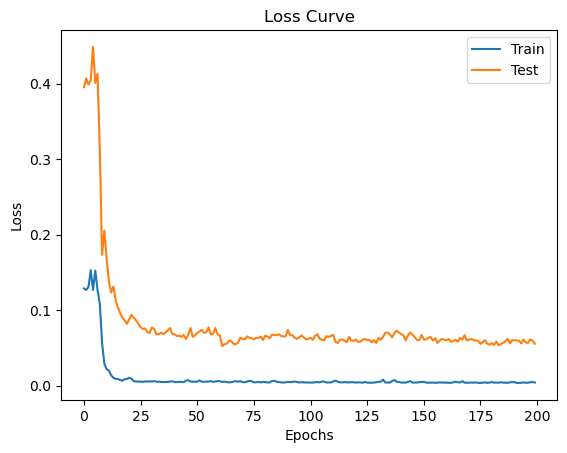

Test Loss: 0.055392455868422986


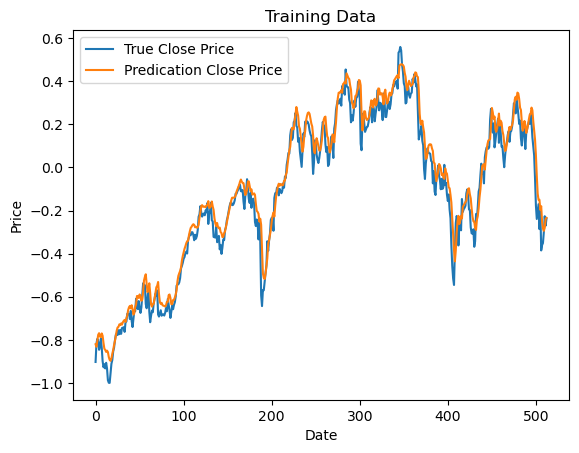

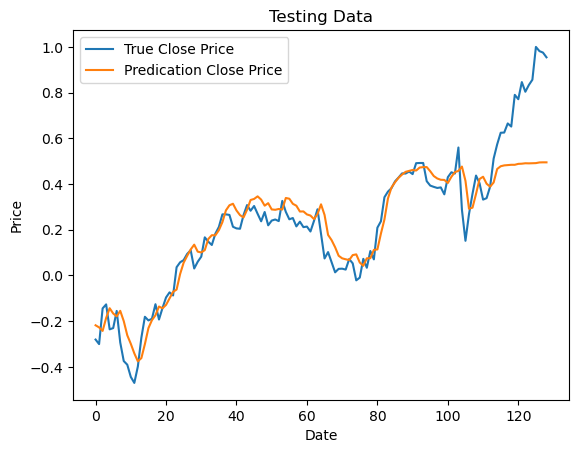

In [4]:

def main_close_price(device='cpu', 
                     start_date=dt.datetime(2014, 1, 1), 
                     end_date=dt.datetime(2015, 12, 31), 
                     look_back=7,
                     num_layers = 4,
                     split_ratio = 0.8):
    """
    Main function to train and test a model for predicting close prices.

    Args:
        device (str, optional): The device to run the model on. Default is 'cpu'.
        start_date (datetime, optional): The start date for data. Default is January 1, 2014.
        end_date (datetime, optional): The end date for data. Default is December 31, 2015.
        look_back (int, optional): The number of previous days to consider for the model. Default is 7.

    Returns:
        None
    """
    
    # Hyperparameters
    batch_size = 32
    learning_rate = 0.001
    criterion = nn.MSELoss()
    optimizer_type = optim.Adam
    epochs = 200
    
    # Generate the data sets for training and testing (Called loaders)
    data_util = DataUtil(start_date,end_date)
    data_info = data_util.generate_data_loaders_close_price(batch_size=batch_size,
                                                                split_ratio=split_ratio,
                                                                look_back=look_back,
                                                                device=device)
    train_loader, test_loader, x_train, y_train, x_test, y_test = data_info
    
    # Create LSTM model
    model = LSTM(1, look_back, num_layers = num_layers).to(device)

    
    # Train the model
    model = train_model(train_loader,
                        test_loader,
                        model=model,
                        criterion=criterion,
                        optimizer_type=optimizer_type,
                        epochs=epochs,
                        learning_rate=learning_rate,
                        load_model=None,
                        device=device)
    
    # Test model
    test_model(test_loader, model, criterion, device) 
    
    # Plot Price Predictions:
    model = model.to('cpu')
    pred_train = model(x_train).detach().numpy()
    pred_test = model(x_test).detach().numpy()
    plot_price_predictions(pred_train,y_train,pred_test,y_test)
    
    # # Save model updates
    # save_model = input('Would you like to save the model? Type "YES" to confirm: ')
    # if save_model.upper() == 'YES':
    #     torch.save(model.state_dict(), 'model_closing_price.pth')
    

main_close_price(device=device, 
                 start_date=start_date, 
                 end_date=end_date, 
                 look_back=look_back,
                 split_ratio=split_ratio)

**Predict Price based on SMH ETF Daily Return**

[[ 0.00362751  0.25497735  0.02565195 ...  0.0671253   0.12704112
  -0.00289744]
 [ 0.65944153  0.00362751  0.25497735 ...  0.24247643  0.0671253
   0.12704112]
 [ 0.29955875  0.65944153  0.00362751 ...  0.37497215  0.24247643
   0.0671253 ]
 ...
 [ 0.11821961  0.69870683  0.2659243  ...  0.45671119  0.11256747
   0.70298313]
 [ 0.15995867  0.11821961  0.69870683 ...  0.02998826  0.45671119
   0.11256747]
 [ 0.10950109  0.15995867  0.11821961 ...  0.28962234  0.02998826
   0.45671119]]
torch.Size([64, 7, 1])
torch.Size([64, 7, 1])
torch.Size([64, 7, 1])
torch.Size([64, 7, 1])
torch.Size([64, 7, 1])
torch.Size([64, 7, 1])
torch.Size([64, 7, 1])
torch.Size([64, 7, 1])
torch.Size([1, 7, 1])
Epoch 1/200, Loss: 0.1059505906369951
Test Loss: 0.0928748498360316
torch.Size([64, 7, 1])
torch.Size([64, 7, 1])
torch.Size([64, 7, 1])
torch.Size([64, 7, 1])
torch.Size([64, 7, 1])
torch.Size([64, 7, 1])
torch.Size([64, 7, 1])
torch.Size([64, 7, 1])
torch.Size([1, 7, 1])
Epoch 2/200, Loss: 0.09878404

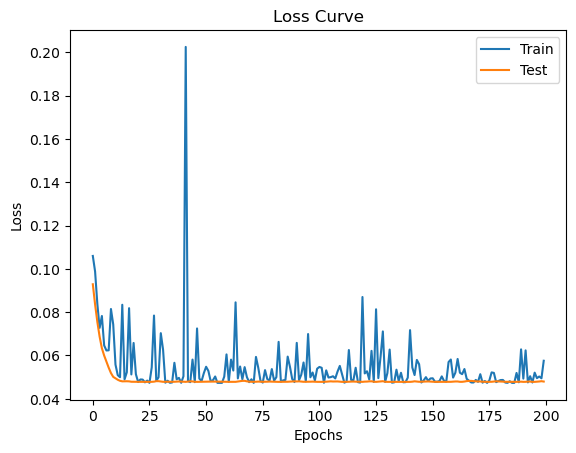

Test Loss: 0.0479618264362216


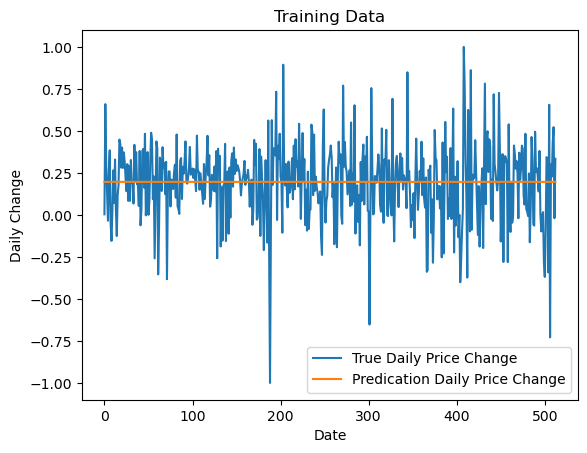

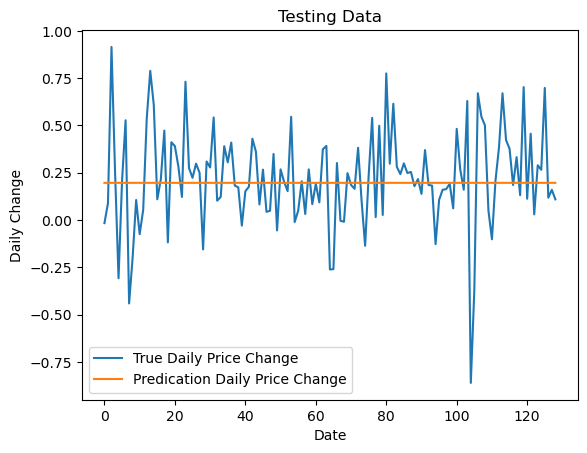

In [5]:

def main_daily_return(device = 'cpu', 
                     start_date = dt.datetime(2014, 1, 1), 
                     end_date = dt.datetime(2015, 12, 31), 
                     look_back = 7,
                     num_layers = 4,
                     split_ratio = 0.8):
    """
    Main function to train and test a model for predicting daily return.

    Args:
        device (str, optional): The device to run the model on. Default is 'cpu'.
        start_date (datetime, optional): The start date for data. Default is January 1, 2014.
        end_date (datetime, optional): The end date for data. Default is December 31, 2015.
        look_back (int, optional): The number of previous days to consider for the model. Default is 7.

    Returns:
        None
    """
    
    # Hyperparameters
    batch_size = 64
    learning_rate = 0.0001
    criterion = nn.MSELoss()
    optimizer_type = optim.Adam
    epochs = 200
    
    # Generate the data sets for training and testing (Called loaders)
    data_util = DataUtil(start_date,end_date)
    data_info = data_util.generate_data_loaders_daily_returns(batch_size=batch_size,
                                                            split_ratio=split_ratio,
                                                            look_back=look_back,
                                                            device=device)
    train_loader, test_loader, x_train, y_train, x_test, y_test = data_info
    
    # Create LSTM model
    model = LSTM(1, 
                 look_back, 
                 num_layers).to(device)

    
    # Train the model
    model = train_model(train_loader,
                        test_loader,
                        model=model,
                        criterion=criterion,
                        optimizer_type=optimizer_type,
                        epochs=epochs,
                        learning_rate=learning_rate,
                        load_model=None,
                        device=device)
    
    # Test model
    test_model(test_loader, model, criterion, device) 
    
    # Plot Price Predictions:
    model = model.to('cpu')
    pred_train = model(x_train).detach().numpy()
    pred_test = model(x_test).detach().numpy()
    plot_daily_change_predictions(pred_train,y_train,pred_test,y_test, save=False)
    
    # # Save model updates
    # save_model = input('Would you like to save the model? Type "YES" to confirm: ')
    # if save_model.upper() == 'YES':
    #     torch.save(model.state_dict(), 'model_daily_returns.pth')
    

main_daily_return(device=device, 
                  start_date=start_date, 
                  end_date=end_date, 
                  look_back=look_back, 
                  split_ratio=split_ratio)

**Predict Price based on SMH ETF Daily Return with multiple features**

torch.Size([64, 1, 49])
torch.Size([64, 1, 49])
torch.Size([64, 1, 49])
torch.Size([64, 1, 49])
torch.Size([64, 1, 49])
torch.Size([64, 1, 49])
torch.Size([64, 1, 49])
torch.Size([64, 1, 49])
torch.Size([1, 1, 49])
Epoch 1/200, Loss: 0.0
Test Loss: 0.0
torch.Size([64, 1, 49])
torch.Size([64, 1, 49])
torch.Size([64, 1, 49])
torch.Size([64, 1, 49])
torch.Size([64, 1, 49])
torch.Size([64, 1, 49])
torch.Size([64, 1, 49])
torch.Size([64, 1, 49])
torch.Size([1, 1, 49])
Epoch 2/200, Loss: 0.0
Test Loss: 0.0
torch.Size([64, 1, 49])
torch.Size([64, 1, 49])
torch.Size([64, 1, 49])
torch.Size([64, 1, 49])
torch.Size([64, 1, 49])
torch.Size([64, 1, 49])
torch.Size([64, 1, 49])
torch.Size([64, 1, 49])
torch.Size([1, 1, 49])
Epoch 3/200, Loss: 0.0
Test Loss: 0.0
torch.Size([64, 1, 49])
torch.Size([64, 1, 49])
torch.Size([64, 1, 49])
torch.Size([64, 1, 49])
torch.Size([64, 1, 49])
torch.Size([64, 1, 49])
torch.Size([64, 1, 49])
torch.Size([64, 1, 49])
torch.Size([1, 1, 49])
Epoch 4/200, Loss: 0.0
Tes

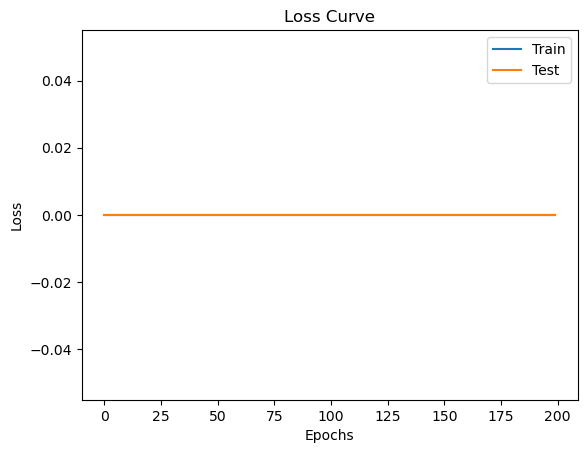

Test Loss: 0.0


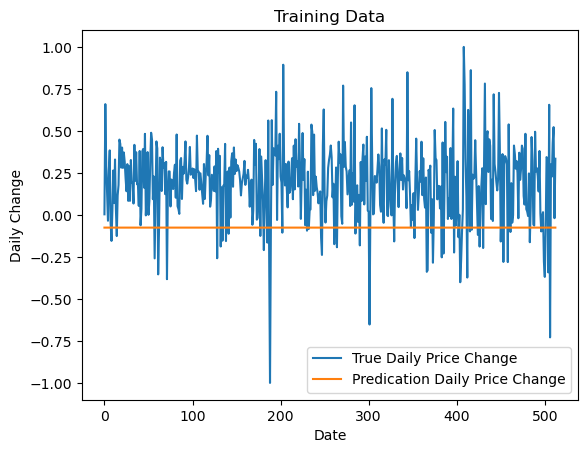

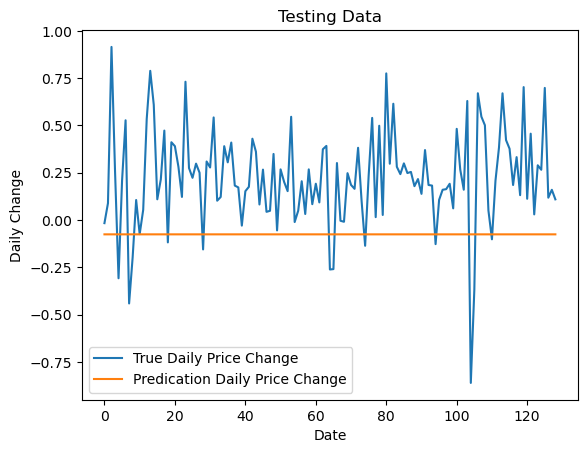

In [8]:

def main_daily_multi_data_return(device = 'cpu', 
                                start_date = dt.datetime(2014, 1, 1), 
                                end_date = dt.datetime(2015, 12, 31), 
                                look_back = 7,
                                num_layers = 4,
                                split_ratio = 0.8):
    """
    Main function to train and test a model for predicting daily return.

    Args:
        device (str, optional): The device to run the model on. Default is 'cpu'.
        start_date (datetime, optional): The start date for data. Default is January 1, 2014.
        end_date (datetime, optional): The end date for data. Default is December 31, 2015.
        look_back (int, optional): The number of previous days to consider for the model. Default is 7.

    Returns:
        None
    """
    
    # Hyperparameters
    batch_size = 64
    learning_rate = 0.0001
    criterion = nn.MSELoss()
    optimizer_type = optim.Adam
    epochs = 200
    
    # Generate the data sets for training and testing (Called loaders)
    data_util = DataUtil(start_date,end_date)
    data_info = data_util.generate_data_loaders_daily_returns_all_features(batch_size=batch_size,
                                                                        split_ratio=split_ratio,
                                                                        look_back=look_back,
                                                                        device=device)
    train_loader, test_loader, x_train, y_train, x_test, y_test = data_info
    
        
    
    # Create LSTM model
    model = LSTM(x_train.shape[2], 
                 look_back, 
                 num_layers).to(device)

    
    # Train the model
    model = train_model(train_loader,
                        test_loader,
                        model=model,
                        criterion=criterion,
                        optimizer_type=optimizer_type,
                        epochs=epochs,
                        learning_rate=learning_rate,
                        load_model=None,
                        device=device)
    
    # Test model
    test_model(test_loader, model, criterion, device) 
    
    # Plot Price Predictions:
    model = model.to('cpu')
    pred_train = model(x_train).detach().numpy()
    pred_test = model(x_test).detach().numpy()
    plot_daily_change_predictions(pred_train,y_train,pred_test,y_test, save=False)
    
    # # Save model updates
    # save_model = input('Would you like to save the model? Type "YES" to confirm: ')
    # if save_model.upper() == 'YES':
    #     torch.save(model.state_dict(), 'model_daily_returns_all_features.pth')
    

main_daily_multi_data_return(device=device, 
                             start_date=start_date, 
                             end_date=end_date, 
                             look_back=look_back,
                             split_ratio = split_ratio)